# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats import stats
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv" 

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
#List cities
lat_lngs = []
cities = []

#Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
setcounter=1
recordcounter=1
cityid=0

url = "http://api.openweathermap.org/data/2.5/weather"
units = "imperial"

print("Beginning Data Retrieval \n ------------------")

citydatalist=[]

for city in cities:
    print(f"Processing Record {recordcounter} of Set {setcounter} | {city}")
    try:
        response = requests.get(url,params={"appid":weather_api_key,"units":units,"q":city}).json()
        citydatalist.append({
            "City_ID":cityid,
            "City":city,
            "Cloudiness":response["clouds"]["all"],
            "Country":response["sys"]["country"],
            "Date":response["dt"],
            "Humidity":response["main"]["humidity"],
            "Lat":response["coord"]["lat"],
            "Lng":response["coord"]["lon"],
            "Max Temp":response["main"]["temp_max"],
            "Wind Speed":response["wind"]["speed"]
        })
    except:
        print("City not found. Skipping...")
    if recordcounter==50:
        recordcounter=1
        setcounter=setcounter+1
    else:
        recordcounter=recordcounter+1
    cityid=cityid+1

print("------------------\nData Retrieval Complete\n------------------")

Beginning Data Retrieval 
 ------------------
Processing Record 1 of Set 1 | luderitz
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | vestmannaeyjar
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | shingu
Processing Record 11 of Set 1 | lavrentiya
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | novikovo
Processing Record 14 of Set 1 | robertsport
Processing Record 15 of Set 1 | sao filipe
Processing Record 16 of Set 1 | sadovoye
Processing Record 17 of Set 1 | leningradskiy
Processing Record 18 of Set 1 | yelniki
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 22 of Set 1 | mullaitivu
City not 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
citydata = pd.DataFrame(citydatalist)

citydata.count()

City_ID       558
City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

In [40]:
df = pd.read_csv (r'output_data/cities.csv')
print (df)

citydata_file = os.path.join('output_data/cities_1.csv')
df.to_csv(citydata_file)

citydata.head()

     City_ID         City  Cloudiness Country        Date  Humidity    Lat  \
0          0    ostrovnoy           2      RU  1558378754        72  68.05   
1          1    mahebourg          75      MU  1558378503        74 -20.41   
2          2      qaanaaq          25      GL  1558378755        73  77.48   
3          3       zhuhai           0      CN  1558378755        39  40.71   
4          4    cape town          20      ZA  1558378755        76 -33.93   
..       ...          ...         ...     ...         ...       ...    ...   
543      543       yabrud           0      SY  1558378840        32  33.97   
544      544      paraiso           5      MX  1558378898         4  24.01   
545      545      veraval           0      FR  1558378898        62  49.65   
546      546  novyy urgal         100      RU  1558378899        93  51.07   
547      547      tongren           4      CN  1558378899        64  27.72   

        Lng  Max Temp  Wind Speed  
0     39.51     37.50      

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,luderitz,0,NA,1606547190,68,-26.65,15.16,64.40,13.87
1,1,mar del plata,0,AR,1606547190,77,-38.00,-57.56,69.01,12.75
2,2,ilulissat,0,GL,1606547190,50,69.22,-51.10,6.80,2.24
3,3,albany,100,US,1606547048,77,42.60,-73.97,46.00,1.01
4,4,vestmannaeyjar,36,IS,1606547191,69,63.44,-20.27,40.10,24.85


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

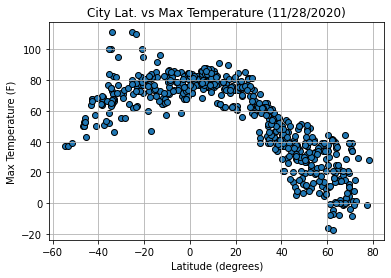

In [41]:
#Grab and format today's date for the graph titles
todaystring=str(pd.to_datetime(citydata.Date.mean(),unit='s'))
month=todaystring[5:7]
day=todaystring[8:10]
year=todaystring[0:4]
today=month+"/"+day+"/"+year

plt.scatter(citydata.Lat,citydata["Max Temp"],edgecolors="black")
plt.title(f"City Lat. vs Max Temperature ({today})")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Max Temperature (F)")
plt.grid(b=True,axis="both")

plt.savefig("output_data/CityLat_v_MaxTemp.png")

## Latitude vs. Humidity Plot

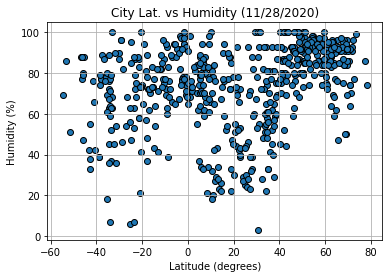

In [42]:
plt.scatter(citydata.Lat,citydata.Humidity,edgecolors="black")
plt.title(f"City Lat. vs Humidity ({today})")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity (%)")
plt.grid(b=True,axis="both")

plt.savefig("output_data/CityLat_v_Humidity.png")

## Latitude vs. Cloudiness Plot

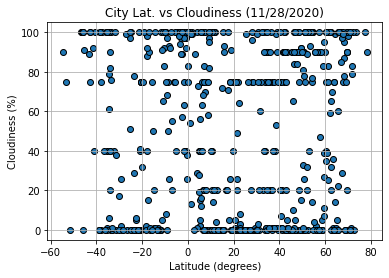

In [43]:
plt.scatter(citydata.Lat,citydata.Cloudiness,edgecolors="black")
plt.title(f"City Lat. vs Cloudiness ({today})")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True,axis="both")

plt.savefig("output_data/CityLat_v_Cloudiness.png")

## Latitude vs. Wind Speed Plot

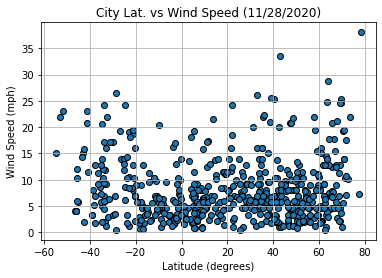

In [44]:
plt.scatter(citydata.Lat,citydata["Wind Speed"],edgecolors="black")
plt.title(f"City Lat. vs Wind Speed ({today})")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True,axis="both")

plt.savefig("output_data/CityLat_v_WindSpeed.png")

## Linear Regression

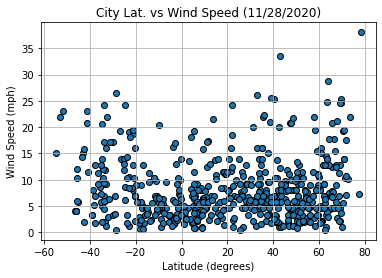

In [45]:
plt.scatter(citydata.Lat,citydata["Wind Speed"],edgecolors="black")
plt.title(f"City Lat. vs Wind Speed ({today})")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True,axis="both")

plt.savefig("output_data/CityLat_v_WindSpeed.png")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [80]:
#Creating Northern Hemisphere DataFrame
northerncitydata = df.loc[df["Lat"] >= 0]
northerncitydata

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
8,8,tiksi,95,RU,1558378756,88,71.64,128.87,14.10,15.70
9,9,pushkinskiye gory,6,RU,1558378756,70,57.02,28.91,65.04,6.93
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


The r-squared is: [-0.8151657406810829]


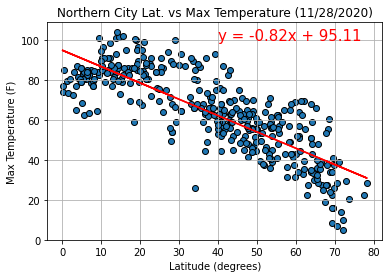

In [118]:
#Use for reference - Northern Hemisphere DataFrame 
# northerncitydata = df.loc[df["Lat"] >= 0]
# northerncitydata

from scipy.stats import linregress

y = northerncitydata["Max Temp"]
x = northerncitydata["Lat"]
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
regression_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northerncitydata['Lat'],northerncitydata['Max Temp'],edgecolors='k')
plt.ylabel("Max Temperature (F)")
plt.plot(x, regression_values, "red")
plt.xlabel("Latitude (degrees)")
plt.title(f"Northern City Lat. vs Max Temperature ({today})")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2

plt.plot(x, regression_values,"r-")
plt.annotate((line_eq),(40,100),fontsize=15,color="red")

print(f"The r-squared is: {[rvalue]}")      

plt.savefig("output_data/NorthernCityLat_v_MaxTemp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [119]:
#Creating Southern Hemisphere DataFrame
southerncitydata = df.loc[df["Lat"] >= 0]
southerncitydata

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
8,8,tiksi,95,RU,1558378756,88,71.64,128.87,14.10,15.70
9,9,pushkinskiye gory,6,RU,1558378756,70,57.02,28.91,65.04,6.93
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


The r-squared is: [-0.8151657406810829]


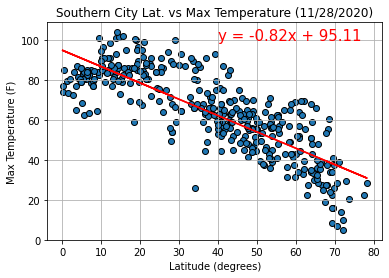

In [120]:
#Use for reference - Southern Hemisphere DataFrame
# southerncitydata = df.loc[df["Lat"] >= 0]
# southerncitydata

y = southerncitydata["Max Temp"]
x = southerncitydata["Lat"]
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
regression_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southerncitydata['Lat'],southerncitydata['Max Temp'],edgecolors='k')
plt.ylabel("Max Temperature (F)")
plt.plot(x, regression_values, "red")
plt.xlabel("Latitude (degrees)")
plt.title(f"Southern City Lat. vs Max Temperature ({today})")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2

plt.plot(x, regression_values,"r-")
plt.annotate((line_eq),(40,100),fontsize=15,color="red")

print(f"The r-squared is: {[rvalue]}")      

plt.savefig("output_data/SouthernCityLat_v_MaxTemp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: [-0.8151657406810829]


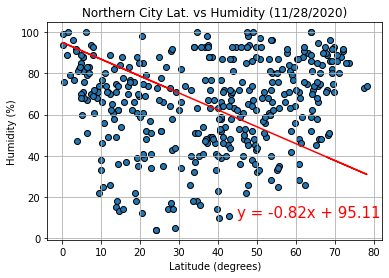

In [139]:
x = northerncitydata.Lat
y = northerncitydata.Humidity

plt.scatter(northerncitydata['Lat'],northerncitydata['Humidity'],edgecolors='k')
plt.title(f"Northern City Lat. vs Humidity ({today})")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity (%)")
plt.grid(b=True,axis="both")

plt.plot(x, regression_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

print(f"The r-squared is: {[rvalue]}")       

plt.savefig("output_data/NorthernCityLat_v_Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: [-0.8151657406810829]


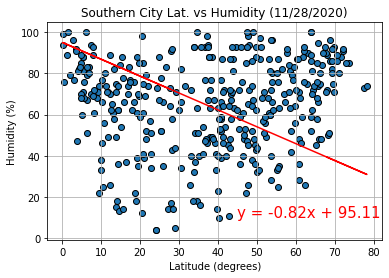

In [142]:
x = southerncitydata.Lat
y = southerncitydata.Humidity

plt.scatter(southerncitydata['Lat'],southerncitydata['Humidity'],edgecolors='k')
plt.title(f"Southern City Lat. vs Humidity ({today})")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity (%)")
plt.grid(b=True,axis="both")

plt.plot(x, regression_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

print(f"The r-squared is: {[rvalue]}")       

plt.savefig("output_data/SouthernCityLat_v_Humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


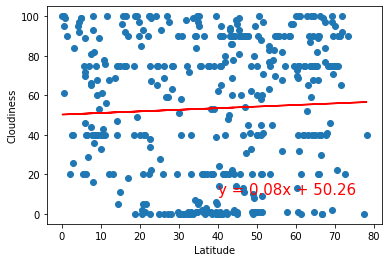

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


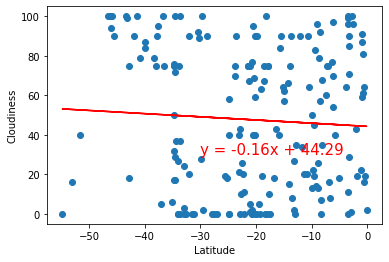

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


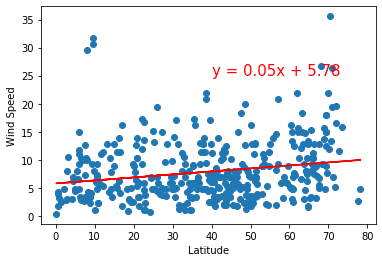

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


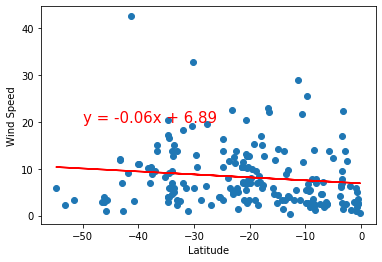